<h1>Python – Iniciando Data Science com Iris Dataset</h1>

<img src ="https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png">
<p><font size = 4 face = 'verdana'>Nesse projeto irei expplorar o conjunto de dados “Iris.csv” que é um conjunto de dados Iris considerado o "Hello World" para a Ciência de Dados. Na web é possível pesquisar e encontrar diversos modelos de exploração desse dataset. Portanto, se você iniciou sua carreira em Ciência de Dados e Aprendizado de Máquina, estará praticando algoritmos básicos de ML neste famoso conjunto de dados. O conjunto de dados Iris contém cinco colunas, como Comprimento da pétala, Largura da pétala, Comprimento da sépala, Largura da sépala e Tipo de espécie. A íris é uma planta com flores, os pesquisadores mediram várias características das diferentes flores de íris e gravaram digitalmente.</font></p>

<p><font size = 4 face = 'verdana'>Para esse projeto especificamente vamos explorar apenas <b>'Iris Setosa'</b> e <b>'Iris Versicolor'</b></font></p>
<p><font size = 4 face = 'verdana'>Vamos iniciar baixando todos as bibliotecas necessária para exploração, e sempre que pensarmos em predição e Machine Learning, o mais comum entre diversos outros é o Sklearn.</font></p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from plotnine import *
import pickle
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
# Vamos fazer o download do arquivo e colocar numa variável que nomeamos de df
df = pd.read_csv("https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset1.csv")

<p><font size = 4 face = 'verdana'>Fazendo a exploração do dataframe temos as seguintes informações:</font></p>
<p><font size = 4 face = 'verdana'>
<li><b>sepal_length</b> - comprimento da sépala</li>	
<li><b>sepal_width</b>  - largura da sépala</li>	
<li><b>petal_length</b> - comprimento da pétala </li>	
<li><b>petal_width</b>  - largura da pétala</li>	
<li><b>species</b>      - espécie</li></font></p>

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Nessa etapa, estamos verificando se existe alguma linha nula
# Nesse caso, sem registros
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<font size = 5 face = 'verdana'><b>GRÁFICO PAIRPLOT</b></font><br>
<p><font size = 4 face = 'verdana'>Os gráficos de pares ou <b>PAIRPLOT</b> são uma ferramenta poderosa para explorar rapidamente distribuições e relacionamentos em um conjunto de dados. Seaborn fornece um método padrão simples para fazer gráficos de pares que podem ser personalizados e estendidos através da classe Pair Grid. Em um projeto de análise de dados, a maior parte do valor geralmente não vem do aprendizado de máquina chamativo, mas da visualização direta dos dados. Um gráfico de pares nos fornece uma primeira visão abrangente de nossos dados e é um ótimo ponto de partida em projetos de análise de dados. </font></p>

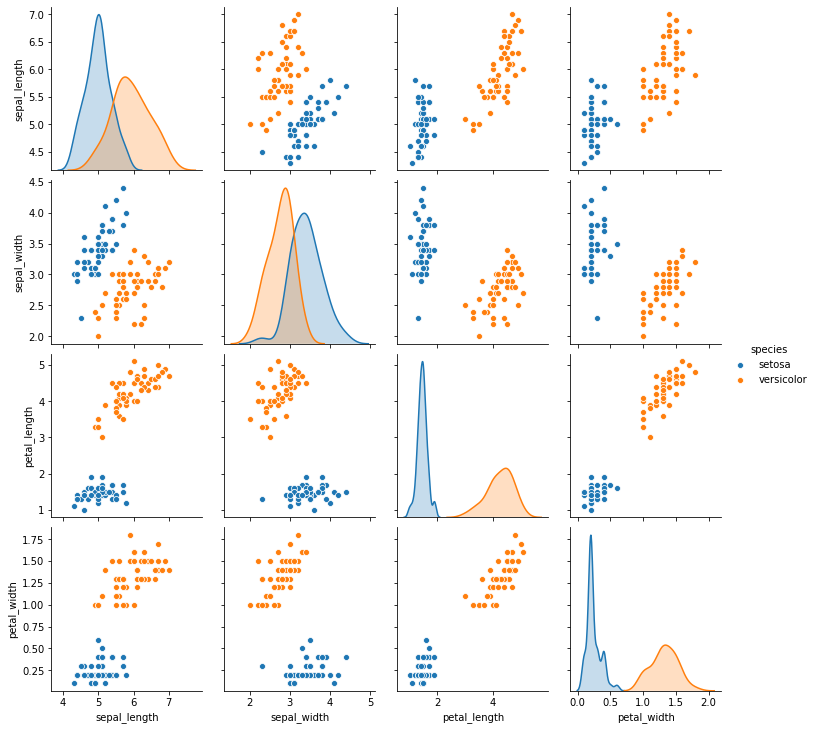

In [6]:
# Abaixo estou plotando um Pairplot da variável “species”, para torná-lo mais compreensível.
g = sns.pairplot(df,hue="species")

<p><font size = 4 face = 'verdana'>Nessa etapa vamos analisar o balanceamento dos dados:<br>
Considerando <b>'setosa'</b> e <b>'versicolor'</b> temos 50 registros de cada, e o percentual de 50% para cada uma delas. 
</font></p>
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true">

In [7]:
# Primeiramente transforme esses dados em dataframe 
total = df.groupby(['species']).agg(n=('species','count')).reset_index()
# Crio mais uma coluna para calcular o percentual
total['( % )'] = 100*total['n']/total['n'].sum()
total

,species,n,( % )
0,setosa,50,50.0
1,versicolor,50,50.0


<font size = 5 face = 'verdana'><b>OUTLIERS</b></font><br>
<p><font size = 4 face = 'verdana'>Vamos verificar se tem valores fora do padrão:<br>
Para isso vamos fazer uso da <b>sns.boxplot(x=df["species"], y=df["sepal_length"], palette="Blues")</b> 
</font></p>
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img3.png?raw=true">

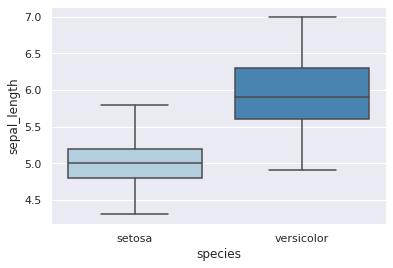

In [8]:
# É interessante mencionar nessa análise que os dados possuem 
# a mesma medida, por isso é possível plotar esse boxplot
sns.set(style="darkgrid")

sns.boxplot(x=df["species"], y=df["sepal_length"], palette="Blues")
plt.show()

<font size = 5 face = 'verdana'><b>SEPARAR OS DADOS EM TARGET E FEATURES</b></font><br>
<font size = 4 face = 'verdana'>Todas as variáveis que estamos tentando <b>PREVER</b>, chama-se <b>TARGET</b> enquanto que todas as outras variáveis que são as principais características ou as  <b>MEDIDAS</b>, chama-se <b>FEATURE</b>.<br>
A coluna <b>TARGET</b> ela também pode ser chamada de <b>CLASSE</b> ou <b>CARDINALIDADE</b> ou <b>LABEL</b>
Por exemplo: Temos 2 classes ou 2 cardinalidades ou 2 labels: setosa e versicolor
</font>

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="500" height="300"/>

In [9]:
X = df.drop(columns = ['species'])
y = df['species']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png">

<font size = 4 face = 'verdana'>Normalmente as <b>FEATURES</b>  são chamadas de X, e as <b>TARGET</b> que queremos prever são chamadas de y.</font>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Existem algoritmos <b>LINEARES, NÃO LINEARES e NÃO LINEARES COMPLEXOS</b>. E qual desses 3 é o melhor?<br>
Na verdade não existe um algorítmo melhor, é necessário testar na prática e verificar qual aquele que se encaixa melhor, ou aquele que tem uma performance melhor. 
<li>LR   -> Linear Regression (Regressão Linear)</li>
<li>LDA  -> linear discriminant analysis (Analise Discriminante Linear)</li>
<li>CART -> Classification And Regression Trees (Arvore de Decisão)</li>
<li>KNN  -> K-Nearest Neighbors (K-vizinhos mais próximos)</li>
<li>SVM  -> Suport Vector Machine (Máquina de vetores de suporte)</li>
<li>RF   -> Random Forest (Floresta Aleatória)</li> 
</font></p>
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="500" height="350"/>

<font size = 5 face = 'verdana'><b>NESSA ETAPA: Vamos treinar os dados nos principais algoritmos supervisionados de classificação</b><font>

In [20]:
LR = LogisticRegression().fit(X_train,y_train)
LDA = LinearDiscriminantAnalysis().fit(X_train,y_train)
CART = DecisionTreeClassifier().fit(X_train,y_train)
KNN = KNeighborsClassifier().fit(X_train,y_train)
SVM = SVC(probability=True).fit(X_train,y_train)
RF = RandomForestClassifier().fit(X_train,y_train)

<b><font size = 5 face = 'verdana'>NESSA ETAPA: Vamos gerar uma tabela e comparar os resultados dos algoritmos em LR e SVM<font></b>

In [19]:
X_train2 = X_train.copy()
X_train2['probabilidade LR'] = LR.predict_proba(X_train)[:,1]
X_train2['probabilidade SVM'] = SVM.predict_proba(X_train)[:,1]
X_train2['cutoff / threshold'] = 0.5
X_train2['predito LR'] = LR.predict(X_train)
X_train2['predito SVM'] = SVM.predict(X_train)
X_train2

,sepal_length,sepal_width,petal_length,petal_width,probabilidade LR,probabilidade SVM,cutoff / threshold,predito LR,predito SVM
28,5.2,3.4,1.4,0.2,0.027948,0.024899,0.5,setosa,setosa
93,5.0,2.3,3.3,1.0,0.885142,0.938105,0.5,versicolor,versicolor
5,5.4,3.9,1.7,0.4,0.045435,0.042044,0.5,setosa,setosa
66,5.6,3.0,4.5,1.5,0.991455,0.985040,0.5,versicolor,versicolor
65,6.7,3.1,4.4,1.4,0.992200,0.972205,0.5,versicolor,versicolor
...,...,...,...,...,...,...,...,...,...
60,5.0,2.0,3.5,1.0,0.937784,0.964881,0.5,versicolor,versicolor
71,6.1,2.8,4.0,1.3,0.979818,0.976821,0.5,versicolor,versicolor
14,5.8,4.0,1.2,0.2,0.014736,0.018357,0.5,setosa,setosa
92,5.8,2.6,4.0,1.2,0.978630,0.980597,0.5,versicolor,versicolor


<p><b><font size = 5 face = 'verdana'>NESSA ETAPA: Vamos escolher a métrica<font></b><p>

In [21]:
print("Acurácia treino LR:", LR.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino LDA:", LDA.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino CART:", CART.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino KNN:", KNN.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")
print("Acurácia treino RF:", SVM.score(X_train[['sepal_length','sepal_width','petal_length','petal_width']], y_train), "\n")

Acurácia treino LR: 1.0 

Acurácia treino LDA: 1.0 

Acurácia treino CART: 1.0 

Acurácia treino KNN: 1.0 

Acurácia treino SVM: 1.0 

Acurácia treino RF: 1.0 



In [24]:
# Depois de treinado o modelo é necessário salvar o arquivo no formato pickle 
# É um arquivo treinado para ser usado numa base de dados
pickle.dump(LR, open('Modelo_Iris.sav','wb'))

### Abrir modelo salvo


In [27]:
loaded_model = pickle.load(open('Modelo_Iris.sav','rb'))

In [34]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
83,6.0,2.7,5.1,1.6
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
39,5.1,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2
80,5.5,2.4,3.8,1.1
10,5.4,3.7,1.5,0.2
0,5.1,3.5,1.4,0.2


In [36]:
loaded_model.predict(X_test)

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor'], dtype=object)

<p><b><font size = 5 face = 'verdana'>ETAPA FINAL: Vamos testar nosso modelo para saber se temos OVERFTING<font></b><p>

In [38]:
loaded_model.score(X_test, y_test)

1.0

<p><b><font size =5 face = 'verdana'>O resultado foi 100%, não tivemos overfting!</b></font></p>